In [18]:
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load dataset
data = pd.read_csv('data.csv')

In [10]:
data.head()

,Age,Height,Weight,Gender,Genre
0,15,66,237,0,Strategy
1,21,60,238,0,Platformer
2,14,78,176,1,Strategy
3,10,67,216,1,Strategy
4,19,69,185,1,RPG


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     201 non-null    int64 
 1   Height  201 non-null    int64 
 2   Weight  201 non-null    int64 
 3   Gender  201 non-null    int64 
 4   Genre   201 non-null    object
dtypes: int64(4), object(1)
memory usage: 8.0+ KB


In [12]:
data.describe()

,Age,Height,Weight,Gender
count,201.000000,201.000000,201.000000,201.000000
mean,22.721393,62.905473,176.457711,0.467662
std,9.427194,8.834932,46.210924,0.500199
min,8.000000,48.000000,100.000000,0.000000
25%,14.000000,55.000000,137.000000,0.000000
50%,23.000000,63.000000,181.000000,0.000000
75%,31.000000,70.000000,216.000000,1.000000
max,38.000000,78.000000,250.000000,1.000000


In [13]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [43]:
#splitting data
train, validate, test = train_validate_test_split(data,'Genre', seed=123)
train.shape, validate.shape, test.shape


((112, 5), (48, 5), (41, 5))

In [16]:
train.Genre.value_counts()

Strategy      31
RPG           31
Platformer    25
Action        25
Name: Genre, dtype: int64

In [17]:
train.Gender.value_counts()

0    59
1    53
Name: Gender, dtype: int64

In [24]:
data.head()

,Age,Height,Weight,Gender,Genre
0,15,66,237,0,Strategy
1,21,60,238,0,Platformer
2,14,78,176,1,Strategy
3,10,67,216,1,Strategy
4,19,69,185,1,RPG


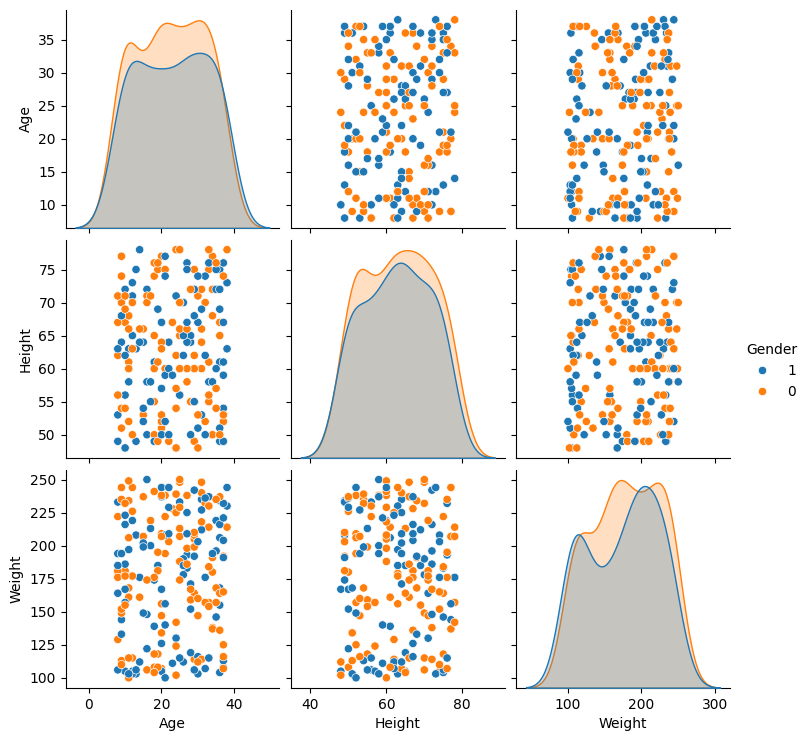

In [38]:
sns.pairplot(data, hue='Gender', hue_order = [1,0])

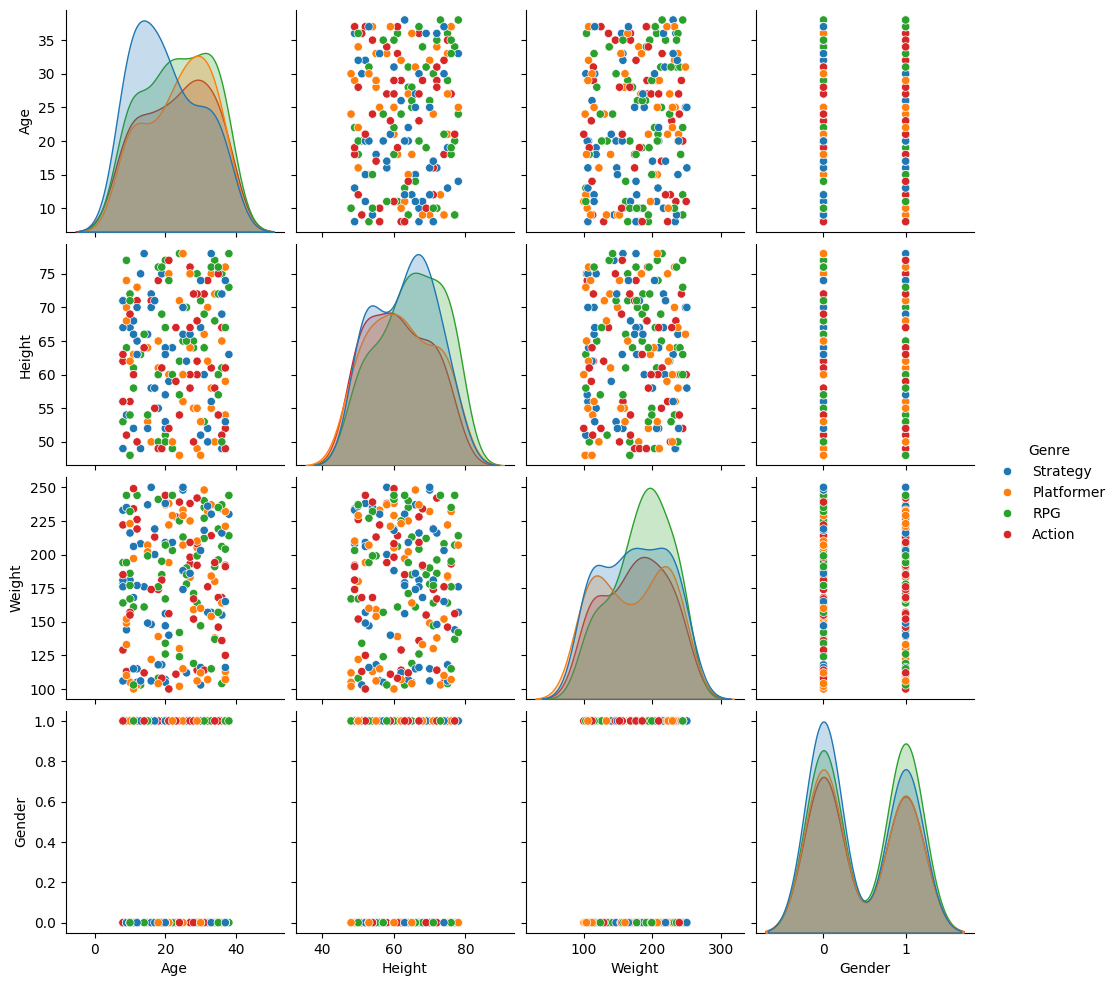

In [25]:
sns.pairplot(data, hue='Genre')

In [29]:
counts = data.groupby('Gender').Genre.value_counts()
counts, type(counts)

(Gender  Genre     
 0       Strategy      31
         RPG           27
         Platformer    25
         Action        24
 1       RPG           28
         Strategy      24
         Action        21
         Platformer    21
 Name: Genre, dtype: int64,
 pandas.core.series.Series)

In [31]:
data.Genre.value_counts()

Strategy      55
RPG           55
Platformer    46
Action        45
Name: Genre, dtype: int64

<Axes: xlabel='Genre', ylabel='count'>

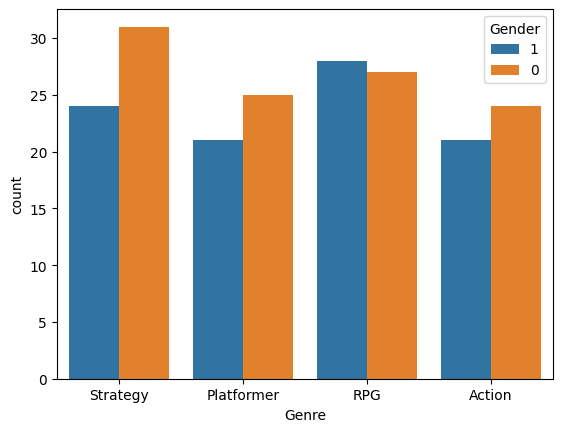

In [37]:
sns.countplot(data, x='Genre', hue='Gender', hue_order = [1, 0])

/tmp/ipykernel_6660/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

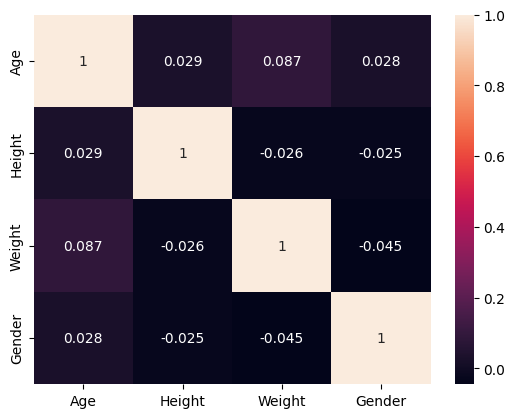

In [35]:
sns.heatmap(data.corr(),annot=True)

In [39]:
train.Genre.value_counts()

Strategy      31
RPG           31
Platformer    25
Action        25
Name: Genre, dtype: int64

In [44]:
train['baseline_prediction'] = 'Strategy'
train.head()

,Age,Height,Weight,Gender,Genre,baseline_prediction
83,9,74,152,0,Platformer,Strategy
184,14,64,112,1,Action,Strategy
73,38,63,230,1,Strategy,Strategy
166,9,64,194,1,RPG,Strategy
105,37,54,113,1,Platformer,Strategy


In [45]:
baseline_accuracy = (train.Genre == train.baseline_prediction).mean()
baseline_accuracy

0.2767857142857143

In [ ]:
# Features and target
X = data[['Age', 'Height', 'Weight', 'Gender']]
y = data['Genre']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

In [ ]:
# Prompt the user to enter each value individually
try:
    age = float(input("Enter age (in years): "))
    height = float(input("Enter height (in inches): "))
    weight = float(input("Enter weight (in lbs): "))
    gender = float(input("Enter gender (0 for female, 1 for male): "))
except ValueError:
    print("Invalid input. Please enter numeric values.")
    sys.exit()

# Input as numpy array
input_features = np.array([[age, height, weight, gender]])
input_scaled = scaler.transform(input_features)


# Make prediction
prediction = knn.predict(input_scaled)
print(f"The predicted favorite video game genre is: {prediction[0]}")